In [1]:
import cv2 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from pylab import *
from scipy import ndimage
import scipy
import scipy.misc

In [2]:
img1 = cv2.imread('car1.jpg')

In [3]:
rows,cols,channels = img1.shape

In [4]:
print img1.shape

(2048L, 1536L, 3L)


In [5]:
px = img1[100,100]


In [6]:
print px

[21 28 25]


In [7]:
img1[2,:,2] = 0

In [8]:
print img1.shape

(2048L, 1536L, 3L)


In [9]:
print img1.size

9437184


In [10]:
print img1.dtype

uint8


In [11]:
plt.imshow(img1, cmap = 'gray', interpolation = 'bicubic')

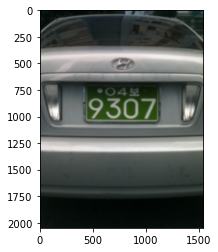

In [12]:
plt.show()

In [13]:
roi = img1[700:1025, 440:1100]

In [14]:
plt.imshow(roi, cmap = 'gray', interpolation = 'bicubic')

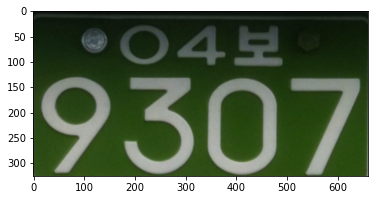

In [15]:
plt.show()

In [16]:
cv2.imwrite("roi.jpg",roi);

In [17]:
img2 = cv2.imread('roi.jpg')

In [18]:
plt.imshow(roi, interpolation = 'bicubic')

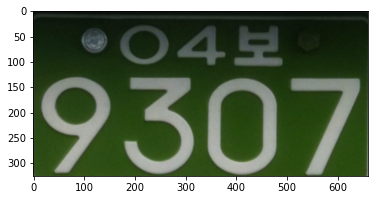

In [19]:
plt.show()

In [20]:
hist,bins = np.histogram(roi.flatten(),256,[0,256]) 

In [21]:
img2gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

In [22]:
plt.imshow(img2gray, cmap = 'gray', interpolation = 'bicubic')

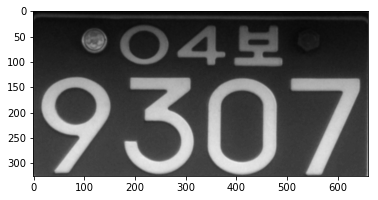

In [23]:
plt.show()

In [24]:
hist,bins = np.histogram(img2gray.flatten(),256,[0,256])

In [25]:
equ = cv2.equalizeHist(img2gray)

In [26]:
plt.imshow(equ, cmap = 'gray', interpolation = 'bicubic')

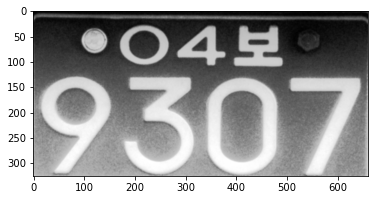

In [27]:
plt.show()

In [28]:
ret,thresh1 = cv2.threshold(img2gray,60,255,cv2.THRESH_BINARY)
th3 = cv2.adaptiveThreshold(img2gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
           cv2.THRESH_BINARY,11,2)
blur = cv2.GaussianBlur(thresh1,(5,5),0)
ret4,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [29]:
 titles = ['Original Image','Binary', 'Gaussian', 'Otsu']

In [30]:
images = [equ, thresh1, th3, th4]

In [31]:
for i in xrange(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])


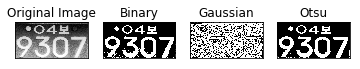

In [32]:
plt.show()

In [33]:
plt.imshow(thresh1)

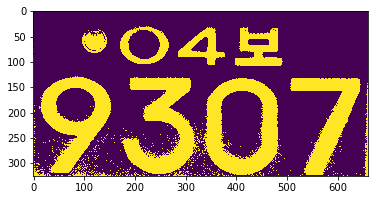

In [34]:
plt.show()

In [35]:
plt.imshow(th4, cmap = 'gray', interpolation = 'bicubic')

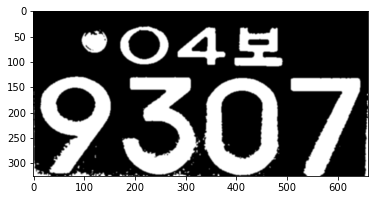

In [36]:
plt.show()

In [37]:
kernel = np.ones((1,1), np.uint8)

In [38]:
f = scipy.misc.face(gray=True)
f = th4[0:rows, 0:cols ]


In [39]:
noisy = f + 0.4*f.std()*np.random.random(f.shape)

In [40]:
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

In [41]:
med_denoised = ndimage.median_filter(noisy, 3)

In [42]:
plt.figure(figsize=(12,2.8))

In [43]:
plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)

In [44]:
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)

In [45]:
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

In [46]:
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)

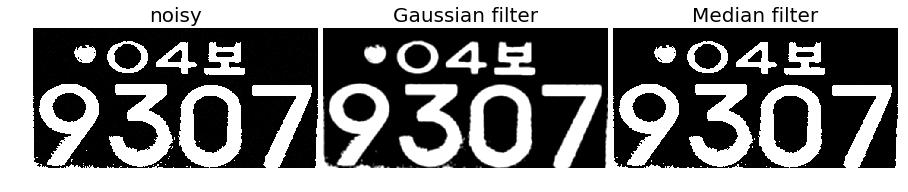

In [47]:
plt.show()

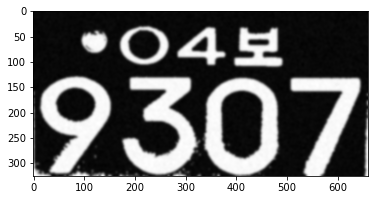

In [48]:
img_erosion1 = cv2.erode(gauss_denoised, kernel, iterations=10)
img_erosion2 = cv2.erode(img_erosion1, kernel, iterations=10)
img_erosion3 = cv2.erode(img_erosion2, kernel, iterations=10)
img_erosion4 = cv2.erode(img_erosion3, kernel, iterations=10)
img_erosion5 = cv2.erode(img_erosion4, kernel, iterations=10)
img_erosion6 = cv2.erode(img_erosion5, kernel, iterations=10)
img_erosion = cv2.erode(img_erosion6, kernel, iterations=10)
plt.imshow(img_erosion, cmap = 'gray', interpolation = 'bicubic')
plt.show()

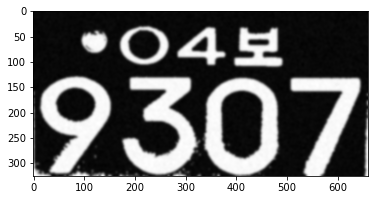

In [49]:
img_dilation1 = cv2.dilate(img_erosion, kernel, iterations=10)
img_dilation2 = cv2.dilate(img_dilation1, kernel, iterations=10)
img_dilation3 = cv2.dilate(img_dilation2, kernel, iterations=10)
img_dilation = cv2.dilate(img_dilation3, kernel, iterations=10)
plt.imshow(img_dilation, cmap = 'gray', interpolation = 'bicubic')
plt.show()

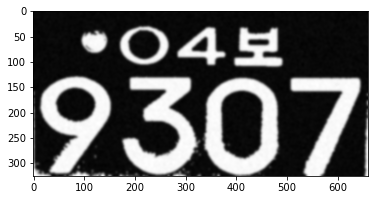

In [50]:
img_erosion11 = cv2.erode(img_dilation, kernel, iterations=1)
img_erosion22 = cv2.erode(img_erosion11, kernel, iterations=1)
img_erosion33 = cv2.erode(img_erosion22, kernel, iterations=1)
img_erosion44 = cv2.erode(img_erosion33, kernel, iterations=1)
img_erosion55 = cv2.erode(img_erosion44, kernel, iterations=1)
img_erosion66 = cv2.erode(img_erosion55, kernel, iterations=1)
img_erosion = cv2.erode(img_erosion66, kernel, iterations=1)
plt.imshow(img_erosion, cmap = 'gray', interpolation = 'bicubic')
plt.show()

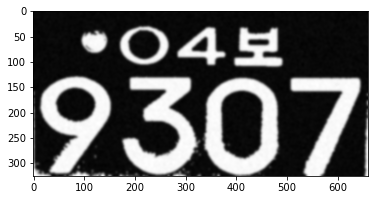

In [51]:
img_dilation11 = cv2.dilate(img_erosion, kernel, iterations=10)
img_dilation22 = cv2.dilate(img_dilation11, kernel, iterations=10)
img_dilation33 = cv2.dilate(img_dilation22, kernel, iterations=10)
img_dilation = cv2.dilate(img_dilation33, kernel, iterations=10)
plt.imshow(img_dilation, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [52]:
f = scipy.misc.face(gray=True)
f = img_dilation[0:rows, 0:cols ]
noisy = f + 0.4*f.std()*np.random.random(f.shape)

In [53]:
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

In [54]:
plt.figure(figsize=(12,2.8))

In [55]:
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)

In [56]:
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)

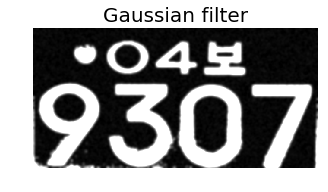

In [57]:
plt.show()